#### Load ORAS5 NetCDF with xarray and inspect

In [40]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr

ds = xr.open_dataset("../Data/vosaline_control_monthly_highres_3D_201501_OPER_v0.1.nc")

print(ds)
print("\nData variables:", list(ds.data_vars))

<xarray.Dataset>
Dimensions:       (deptht: 75, y: 1021, x: 1442, time_counter: 1)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 2015-01-16
Dimensions without coordinates: y, x
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean salinity
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...

Data variables: ['vosaline']


In [4]:
# Extract 2D lat/lon
lat2d = ds["nav_lat"].values   # shape (y, x)
lon2d = ds["nav_lon"].values   # shape (y, x)

# Convert lon to 0..360 for matching CASCADE (optional but usually helpful)
lon2d_0360 = lon2d % 360

In [6]:
lon2d_0360

array([[72.75    , 73.      , 73.25    , ..., 72.5     , 72.75    ,
        73.      ],
       [72.75    , 73.      , 73.25    , ..., 72.5     , 72.75    ,
        73.      ],
       [72.75    , 73.      , 73.25    , ..., 72.5     , 72.75    ,
        73.      ],
       ...,
       [72.999985, 73.      , 73.000015, ..., 72.99432 , 72.999985,
        73.      ],
       [73.      , 73.      , 73.      , ..., 73.      , 73.      ,
        73.      ],
       [73.000015, 73.      , 72.999985, ..., 73.00568 , 73.000015,
        73.      ]], dtype=float32)

In [8]:
ds.head()

<xarray.Dataset>
Dimensions:       (deptht: 5, y: 5, x: 5, time_counter: 1)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 3.856 5.14
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 ... -76.78 -76.78 -76.78
    nav_lon       (y, x) float32 72.75 73.0 73.25 73.5 ... 73.0 73.25 73.5 73.75
  * time_counter  (time_counter) datetime64[ns] 2015-01-16
Dimensions without coordinates: y, x
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean salinity
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...

In [41]:
import numpy as np
import pandas as pd
ab = pd.read_csv("../Data/Zenodo/gridded_datasets/gridded_abundances.csv")

ab["time"] = pd.to_datetime(dict(year=ab["Year"], month=ab["Month"], day=15))
ab = ab.rename(columns={"Latitude":"lat", "Longitude":"lon", "Depth":"depth_m", "cells L-1":"cells_per_L"})

ab["lon_0360"] = ab["lon"] % 360

In [47]:
ab["Year"].unique()

array([1996, 1993, 1969, 1968, 1965, 2012, 2013, 2011, 2007, 2002, 2003,
       2004, 2001, 2014, 2010, 2009, 1995, 2000, 2005, 1998, 1997, 2018,
       2017, 2019, 2006, 2016, 2015, 1994, 1999, 1992, 2008, 1985, 1991,
       1964, 1967, 1990, 1966, 1988, 1987])

In [14]:
ab["Month"].unique()

array([ 2,  3,  1, 12,  9, 11,  8,  5,  4,  7,  6, 10])

In [16]:
ab_jan2015 = ab[(ab["Year"] == 2015) & (ab["Month"] == 1)].copy()
print("CASCADE points in Jan 2015:", len(ab_jan2015))

CASCADE points in Jan 2015: 0


In [49]:
ds = xr.open_dataset("../Data/vosaline_control_monthly_highres_3D_201302_CONS_v0.1.nc")

print(ds)
print("\nData variables:", list(ds.data_vars))

<xarray.Dataset>
Dimensions:       (deptht: 75, y: 1021, x: 1442, time_counter: 1)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 2013-02-15
Dimensions without coordinates: y, x
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean salinity
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...

Data variables: ['vosaline']


In [55]:
ds['vosaline']

<xarray.DataArray 'vosaline' (time_counter: 1, deptht: 75, y: 1021, x: 1442)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 2013-02-15
Dimensions without coordinates: y, x
Attributes:
    standard_name:       Salinity
    long_name:           Salinity
    units:               PSU
    online_operation:    ave(x)
    interval_operation:  1200.0
    interval_write:      2678400.0
    offline_operation:   ave(x)
    institution:         ECMWF

In [60]:
# Extract 2D lat/lon
lat2d = ds["nav_lat"].values   # shape (y, x)
lon2d = ds["nav_lon"].values   # shape (y, x)

# Convert lon to 0..360 for matching CASCADE
lon2d_0360 = lon2d % 360

In [62]:
ab_jan2012 = ab[(ab["Year"] == 2013) & (ab["Month"] == 2)].copy()
print("CASCADE points in Jan 2012:", len(ab_jan2012))

CASCADE points in Jan 2012: 282


In [68]:
def nearest_yx(lat_pt, lon_pt_0360, lat2d, lon2d_0360):
    # distance on lat/lon degrees (good enough for nearest-cell picking)
    d2 = (lat2d - lat_pt)**2 + (lon2d_0360 - lon_pt_0360)**2
    iy, ix = np.unravel_index(np.nanargmin(d2), d2.shape)
    return int(iy), int(ix)

# Try on a small sample first
sample = ab_jan2012.sample(min(200, len(ab_jan2012)), random_state=0).copy()

ys, xs = [], []
for r in sample.itertuples(index=False):
    iy, ix = nearest_yx(r.lat, r.lon_0360, lat2d, lon2d_0360)
    ys.append(iy); xs.append(ix)

sample["y_idx"] = ys
sample["x_idx"] = xs
sample.head()

,lat,lon,depth_m,Month,Year,Species,cells_per_L,time,lon_0360,y_idx,x_idx
19885,43.0,15.0,0,2,2013,Rhabdosphaera clavigera HET,1291.666667,2013-02-15,15.0,695,1207
5065,43.0,15.0,45,2,2013,Calciosolenia murrayi HET,164.000000,2013-02-15,15.0,695,1207
10558,45.0,13.0,0,2,2013,Emiliania huxleyi HET,40516.000000,2013-02-15,13.0,706,1198
23758,43.0,15.0,35,2,2013,Syracosphaera marginiporata HET,2056.000000,2013-02-15,15.0,695,1207
28941,43.0,15.0,25,2,2013,Syracosphaera strigilis HET,1515.000000,2013-02-15,15.0,695,1207


In [70]:
sample.shape

(200, 11)

In [72]:
sample

,lat,lon,depth_m,Month,Year,Species,cells_per_L,time,lon_0360,y_idx,x_idx
19885,43.0,15.0,0,2,2013,Rhabdosphaera clavigera HET,1291.666667,2013-02-15,15.0,695,1207
5065,43.0,15.0,45,2,2013,Calciosolenia murrayi HET,164.000000,2013-02-15,15.0,695,1207
10558,45.0,13.0,0,2,2013,Emiliania huxleyi HET,40516.000000,2013-02-15,13.0,706,1198
23758,43.0,15.0,35,2,2013,Syracosphaera marginiporata HET,2056.000000,2013-02-15,15.0,695,1207
28941,43.0,15.0,25,2,2013,Syracosphaera strigilis HET,1515.000000,2013-02-15,15.0,695,1207
...,...,...,...,...,...,...,...,...,...,...,...
23215,41.0,13.0,5,2,2013,Syracosphaera histrica HET,394.551113,2013-02-15,13.0,682,1200
14630,43.0,15.0,60,2,2013,Helicosphaera HOL ponticuliferus type,311.000000,2013-02-15,15.0,695,1207
20419,43.0,15.0,30,2,2013,Rhabdosphaera xiphos HET,658.000000,2013-02-15,15.0,695,1207
26537,43.0,15.0,35,2,2013,Syracosphaera ossa HET,808.000000,2013-02-15,15.0,695,1207


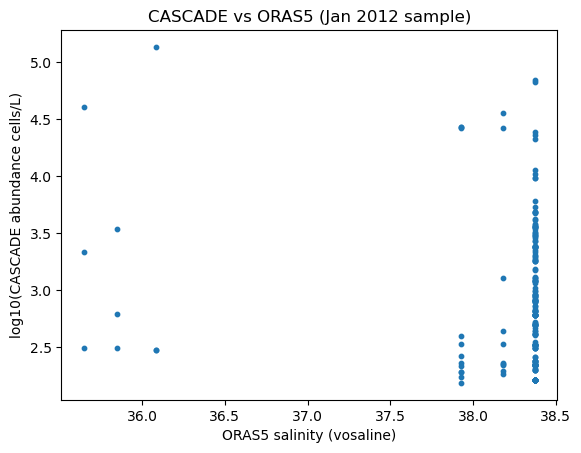

Correlation (log abundance vs salinity): -0.10609912027427659


In [78]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = sample[["cells_per_L", "oras5_vosaline"]].dropna().copy()
plot_df["log_ab"] = np.log10(plot_df["cells_per_L"].clip(lower=1e-6))

plt.figure()
plt.scatter(plot_df["oras5_vosaline"], plot_df["log_ab"], s=10)
plt.xlabel("ORAS5 salinity (vosaline)")
plt.ylabel("log10(CASCADE abundance cells/L)")
plt.title("CASCADE vs ORAS5 (Jan 2012 sample)")
plt.show()

print("Correlation (log abundance vs salinity):", plot_df["oras5_vosaline"].corr(plot_df["log_ab"]))

In [76]:
depths = ds["deptht"].values

def nearest_depth_index(depth_m, depths):
    return int(np.argmin(np.abs(depths - depth_m)))

sal_vals = []
for r in sample.itertuples(index=False):
    iz = nearest_depth_index(r.depth_m, depths) if pd.notna(r.depth_m) else 0
    sal = ds["vosaline"].isel(time_counter=0, deptht=iz, y=r.y_idx, x=r.x_idx).values
    sal_vals.append(float(sal))

sample["oras5_vosaline"] = sal_vals

print("Added column:", "oras5_vosaline" in sample.columns)
display(sample.head())

Added column: True


,lat,lon,depth_m,Month,Year,Species,cells_per_L,time,lon_0360,y_idx,x_idx,oras5_vosaline
19885,43.0,15.0,0,2,2013,Rhabdosphaera clavigera HET,1291.666667,2013-02-15,15.0,695,1207,38.373638
5065,43.0,15.0,45,2,2013,Calciosolenia murrayi HET,164.000000,2013-02-15,15.0,695,1207,38.373665
10558,45.0,13.0,0,2,2013,Emiliania huxleyi HET,40516.000000,2013-02-15,13.0,706,1198,35.648174
23758,43.0,15.0,35,2,2013,Syracosphaera marginiporata HET,2056.000000,2013-02-15,15.0,695,1207,38.373657
28941,43.0,15.0,25,2,2013,Syracosphaera strigilis HET,1515.000000,2013-02-15,15.0,695,1207,38.373653


In [23]:
import xarray as xr

temp = xr.open_dataset("../Data/votemper_control_monthly_highres_3D_200103_CONS_v0.1.nc")
salt = xr.open_dataset("../Data/vosaline_control_monthly_highres_3D_200103_CONS_v0.1.nc")
uvel = xr.open_dataset("../Data/vozocrtx_control_monthly_highres_3D_200103_CONS_v0.1.nc")
vvel = xr.open_dataset("../Data/vosaline_control_monthly_highres_3D_200103_CONS_v0.1.nc")

print(temp)

<xarray.Dataset>
Dimensions:       (deptht: 75, y: 1021, x: 1442, time_counter: 1)
Coordinates:
  * deptht        (deptht) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat       (y, x) float32 ...
    nav_lon       (y, x) float32 ...
  * time_counter  (time_counter) datetime64[ns] 2001-03-16
Dimensions without coordinates: y, x
Data variables:
    votemper      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean temperature
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...


In [3]:
print(temp["time_counter"].values)

['2001-03-16T00:00:00.000000000']


In [5]:
import pandas as pd

cascade = pd.read_csv(
    "../Data/Zenodo/gridded_datasets/gridded_abundances.csv"
)

cascade["time"] = pd.to_datetime(
    dict(year=cascade["Year"], month=cascade["Month"], day=15)
)

cascade = cascade.rename(columns={
    "Latitude": "lat",
    "Longitude": "lon",
    "Depth": "depth_m",
    "cells L-1": "cells_per_L"
})

cascade["lon_0360"] = cascade["lon"] % 360

In [7]:
cascade_2001 = cascade[
    (cascade["Year"] == 2001) &
    (cascade["Month"].isin([3, 9]))
].copy()

print("CASCADE samples:", len(cascade_2001))
cascade_2001.head()

CASCADE samples: 10


,lat,lon,depth_m,Month,Year,Species,cells_per_L,time,lon_0360
1773,39.0,2.0,50,9,2001,Algirosphaera robusta HET,670.000000,2001-09-15,2.0
4488,39.0,2.0,75,9,2001,Calciosolenia brasiliensis HET,1310.000000,2001-09-15,2.0
4563,50.0,4.0,10,9,2001,Calciosolenia brasiliensis HET,750.000000,2001-09-15,4.0
5774,50.0,4.0,10,9,2001,Coccolithus pelagicus HET,40.000000,2001-09-15,4.0
10814,50.0,4.0,10,9,2001,Emiliania huxleyi HET,11850.833333,2001-09-15,4.0


In [9]:
import numpy as np

lat2d = temp["nav_lat"].values
lon2d = temp["nav_lon"].values % 360
depths = temp["deptht"].values

In [11]:
def nearest_yx(lat_pt, lon_pt, lat2d, lon2d):
    d2 = (lat2d - lat_pt)**2 + (lon2d - lon_pt)**2
    return np.unravel_index(np.nanargmin(d2), d2.shape)

def nearest_depth(depth_m, depths):
    return int(np.argmin(np.abs(depths - depth_m)))

In [13]:
records = []

for r in cascade_2001.itertuples(index=False):
    iy, ix = nearest_yx(r.lat, r.lon_0360, lat2d, lon2d)
    iz = nearest_depth(r.depth_m, depths) if pd.notna(r.depth_m) else 0
    
    t_idx = np.where(temp["time_counter"].values == r.time)[0]
    if len(t_idx) == 0:
        continue
    t = t_idx[0]

    rec = {
        "time": r.time,
        "lat": r.lat,
        "lon": r.lon,
        "depth_m": r.depth_m,
        "cells_per_L": r.cells_per_L,
        "temperature": float(temp["votemper"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "salinity": float(salt["vosaline"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "u_velocity": float(uvel["vozocrtx"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "v_velocity": float(vvel["vomecrty"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
    }
    records.append(rec)

df = pd.DataFrame(records)
print("Joined samples:", len(df))
df.head()

Joined samples: 0


""


In [17]:
print("ORAS5 times:", temp["time_counter"].values)
print("CASCADE times:", sorted(cascade_2001["time"].unique()))

ORAS5 times: ['2001-03-16T00:00:00.000000000']
CASCADE times: [Timestamp('2001-03-15 00:00:00'), Timestamp('2001-09-15 00:00:00')]


In [35]:

# ORAS5 times available in the loaded file(s)
oras_times = pd.to_datetime(temp["time_counter"].values)

# Which (year, month) exist in ORAS5?
oras_year_month = set(zip(oras_times.year, oras_times.month))
print("ORAS5 available (year, month):", sorted(oras_year_month))

# Filter CASCADE to only months present in ORAS5
cascade_match = cascade_2001[cascade_2001.apply(lambda r: (r["Year"], r["Month"]) in oras_year_month, axis=1)].copy()
cascade_drop  = cascade_2001[~cascade_2001.index.isin(cascade_match.index)].copy()

print("CASCADE rows total:", len(cascade_2001))
print("CASCADE rows match ORAS5 months:", len(cascade_match))
print("CASCADE rows dropped (no ORAS5 month):", len(cascade_drop))
if len(cascade_drop) > 0:
    print("Dropped months:", sorted(cascade_drop[["Year","Month"]].drop_duplicates().itertuples(index=False, name=None)))

records = []

for r in cascade_match.itertuples(index=False):
    # nearest (y,x)
    iy, ix = nearest_yx(r.lat, r.lon_0360, lat2d, lon2d)
    # nearest depth
    iz = nearest_depth(r.depth_m, depths) if pd.notna(r.depth_m) else 0

    # match ORAS5 time by year+month
    mask = (oras_times.year == r.Year) & (oras_times.month == r.Month)
    idx = np.where(mask)[0]
    if len(idx) == 0:
        continue
    t = int(idx[0])

    rec = {
        "time_oras5": oras_times[t],
        "Year": r.Year,
        "Month": r.Month,
        "lat": r.lat,
        "lon": r.lon,
        "depth_m": r.depth_m,
        "cells_per_L": r.cells_per_L,
        "temperature": float(temp["votemper"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "salinity": float(salt["vosaline"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "u_velocity": float(uvel["vozocrtx"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
        "v_velocity": float(vvel["vomecrty"].isel(time_counter=t, deptht=iz, y=iy, x=ix)),
    }
    records.append(rec)

df = pd.DataFrame(records)
print("Joined samples:", len(df))
display(df.head())

ORAS5 available (year, month): [(2001, 3)]
CASCADE rows total: 10
CASCADE rows match ORAS5 months: 3
CASCADE rows dropped (no ORAS5 month): 7
Dropped months: [(2001, 9)]


ValueError: Dimensions {'deptht'} do not exist. Expected one or more of Frozen({'depthu': 75, 'y': 1021, 'x': 1442, 'time_counter': 1})

In [27]:
def find_depth_dim(ds):
    for d in ["deptht", "depthu", "depthv", "depthw", "depth", "lev", "level"]:
        if d in ds.dims:
            return d
    return None

dT = find_depth_dim(temp)
dS = find_depth_dim(salt)
dU = find_depth_dim(uvel)
dV = find_depth_dim(vvel)

print("Depth dims:", {"temp": dT, "salt": dS, "uvel": dU, "vvel": dV})

Depth dims: {'temp': 'deptht', 'salt': 'deptht', 'uvel': 'depthu', 'vvel': 'deptht'}


In [29]:
depths_T = temp[dT].values if dT else None
depths_S = salt[dS].values if dS else None
depths_U = uvel[dU].values if dU else None
depths_V = vvel[dV].values if dV else None

In [31]:
def nearest_depth_index(depth_m, depths):
    if depths is None or pd.isna(depth_m):
        return 0
    return int(np.argmin(np.abs(depths - depth_m)))

In [33]:
oras_times = pd.to_datetime(temp["time_counter"].values)

# ORAS5 available year-month in the currently opened file(s)
oras_year_month = set(zip(oras_times.year, oras_times.month))
print("ORAS5 available (year, month):", sorted(oras_year_month))

# Filter CASCADE rows to those months that exist in ORAS5
cascade_match = cascade_2001[cascade_2001.apply(lambda r: (r["Year"], r["Month"]) in oras_year_month, axis=1)].copy()
print("CASCADE rows total:", len(cascade_2001))
print("CASCADE rows match ORAS5 months:", len(cascade_match))

records = []

for r in cascade_match.itertuples(index=False):
    # nearest ORAS grid cell
    iy, ix = nearest_yx(r.lat, r.lon_0360, lat2d, lon2d)

    # match ORAS5 time by year+month
    mask = (oras_times.year == r.Year) & (oras_times.month == r.Month)
    idx = np.where(mask)[0]
    if len(idx) == 0:
        continue
    t = int(idx[0])

    # choose nearest depth index separately for each variable set
    izT = nearest_depth_index(r.depth_m, depths_T)
    izS = nearest_depth_index(r.depth_m, depths_S)
    izU = nearest_depth_index(r.depth_m, depths_U)
    izV = nearest_depth_index(r.depth_m, depths_V)

    rec = {
        "time_oras5": oras_times[t],
        "Year": r.Year,
        "Month": r.Month,
        "lat": r.lat,
        "lon": r.lon,
        "depth_m": r.depth_m,
        "cells_per_L": r.cells_per_L,
        "temperature": float(temp["votemper"].isel(time_counter=t, **{dT: izT}, y=iy, x=ix)),
        "salinity": float(salt["vosaline"].isel(time_counter=t, **{dS: izS}, y=iy, x=ix)),
        "u_velocity": float(uvel["vozocrtx"].isel(time_counter=t, **{dU: izU}, y=iy, x=ix)),
        "v_velocity": float(vvel["vomecrty"].isel(time_counter=t, **{dV: izV}, y=iy, x=ix)),
    }
    records.append(rec)

df = pd.DataFrame(records)
print("Joined samples:", len(df))
display(df.head())

ORAS5 available (year, month): [(2001, 3)]
CASCADE rows total: 10
CASCADE rows match ORAS5 months: 3


KeyError: 'vomecrty'